Датасет - https://www.kaggle.com/datasets/lodetomasi1995/income-classification

Загрузить датасет в Python.  
Описать набор данных и решаемую задачу.  
Выделить целевую переменную и факторные переменные.  
Удалить ненужные данные, проанализировать отсутствующие значения.  
Прокомментировать количественные параметры датасета.  
Разбить выборку на обучающую и тестовую.  
Работа по вариантам.  


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


import time

import warnings
warnings.filterwarnings(action='ignore')

## Подготовительный этап

In [2]:
df = pd.read_csv('./dsets/income_evaluation.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


14 факторов:
- age (возраст)
- workclass
- fnlwgt
- education (образование)
- education-num
- marital-status (семейное положение)
- occupation (профессия)
- relationship (отношения)
- race (раса)
- sex (пол)
- capital-gain (прирост капитала)
- capital-loss (потеря капитала)
- hours-per-week (часы в неделю)
- native-country (родная страна)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
categorical_cols = df.columns[df.dtypes == object]
for s in categorical_cols:
    print(s, '=>', df[s].unique(), '\n')

 workclass => [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

 education => [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

 marital-status => [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'] 

 occupation => [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'] 

 relationship => [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'] 

 race => [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other'] 

 sex => [' Male' ' Female'] 

 native-country => [

В данной работе целевой переменной определим income, а именно будем определять, зарабатывает ли человек более 50 тысяч в год. Бинарная классификация. 

In [6]:
df.shape

(32561, 15)

Датасет состоит из 15 колонок - 14 признака и 1 целевая переменная и 32561 строки.

## Анализ данных

Проверка полноты данных (обработка нулевых значений)

In [7]:
df.isnull().sum() #никакие данные не пропущены

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

Распределение целевой переменной

In [8]:
df.columns = df.columns.str.replace(' ', '')

for col in df.columns[df.dtypes == object]:
    df[col] = df[col].str.strip()

In [9]:
df['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

<AxesSubplot:>

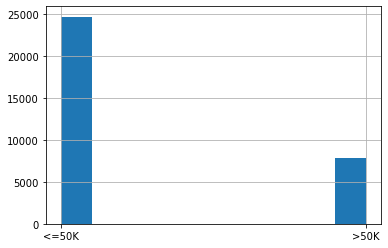

In [10]:
df['income'].hist() # людей, чей доход меньше 50к значительно больше

In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [12]:
def Bar_4(x):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.countplot(df[x[0]])

    plt.subplot(2,2,2)
    sns.countplot(df[x[1]])

    plt.subplot(2,2,3)
    sns.countplot(df[x[2]])

    
    plt.subplot(2,2,4)
    sns.countplot(df[x[3]])

def Bar_6(x):
    plt.figure(figsize=(18,12))
    plt.subplot(3,2,1)
    sns.countplot(df[x[0]])

    plt.subplot(3,2,2)
    sns.countplot(df[x[1]])

    plt.subplot(3,2,3)
    sns.countplot(df[x[2]])

    plt.subplot(3,2,4)
    sns.countplot(df[x[3]])
    
    plt.subplot(3,2,5)
    sns.countplot(df[x[4]])
    
    plt.subplot(3,2,6)
    sns.countplot(df[x[5]])

<AxesSubplot:xlabel='age', ylabel='count'>

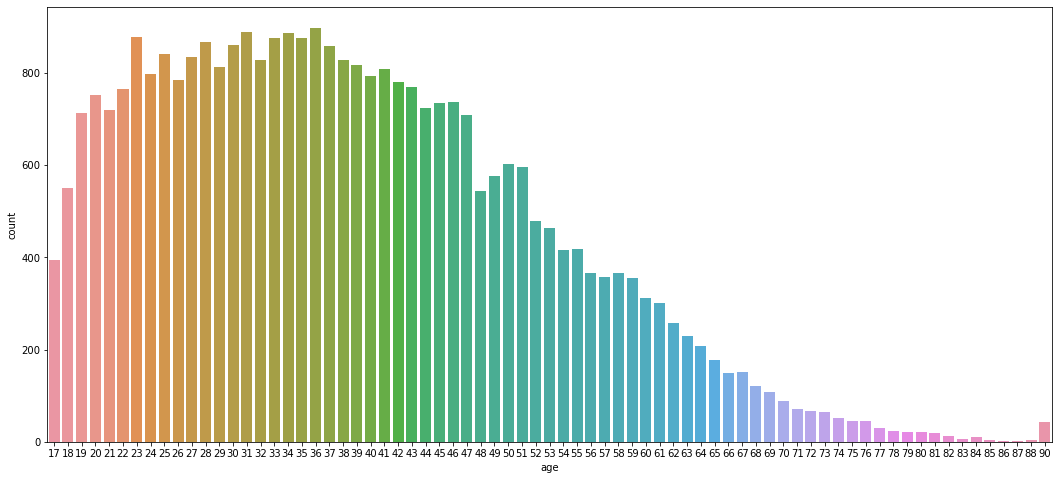

In [13]:
plt.figure(figsize=(18,8))
sns.countplot(df['age'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

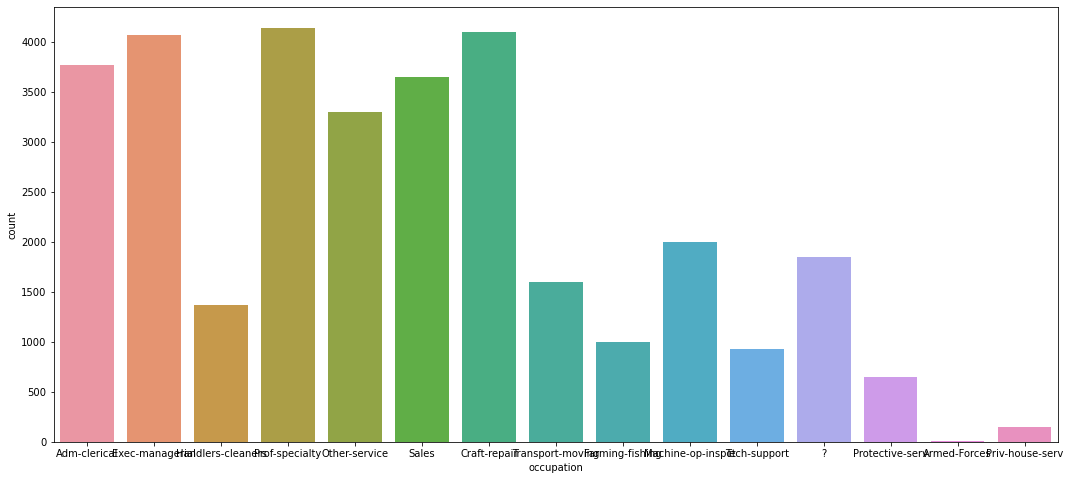

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(df['occupation'])

<AxesSubplot:xlabel='education', ylabel='count'>

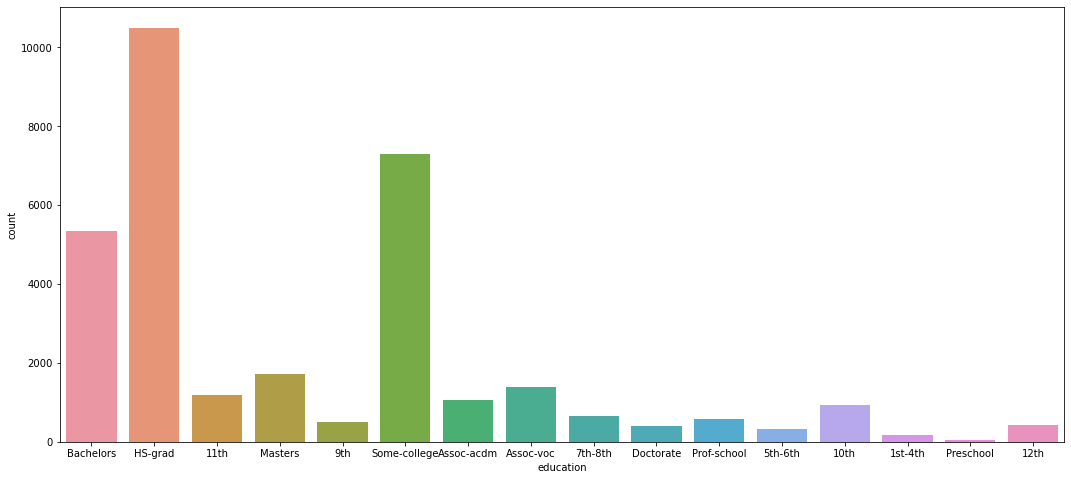

In [15]:
plt.figure(figsize=(18,8))
sns.countplot(df['education'])

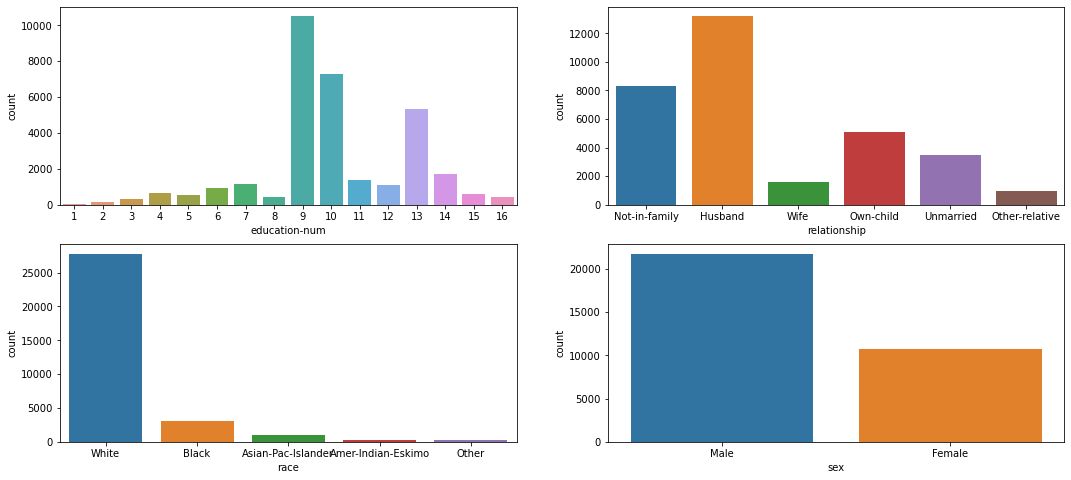

In [16]:
Bar_4(['education-num', 'relationship', 'race', 'sex'])

In [17]:
# plt.figure(figsize=(18,8))
# sns.countplot(df['fnlwgt'])

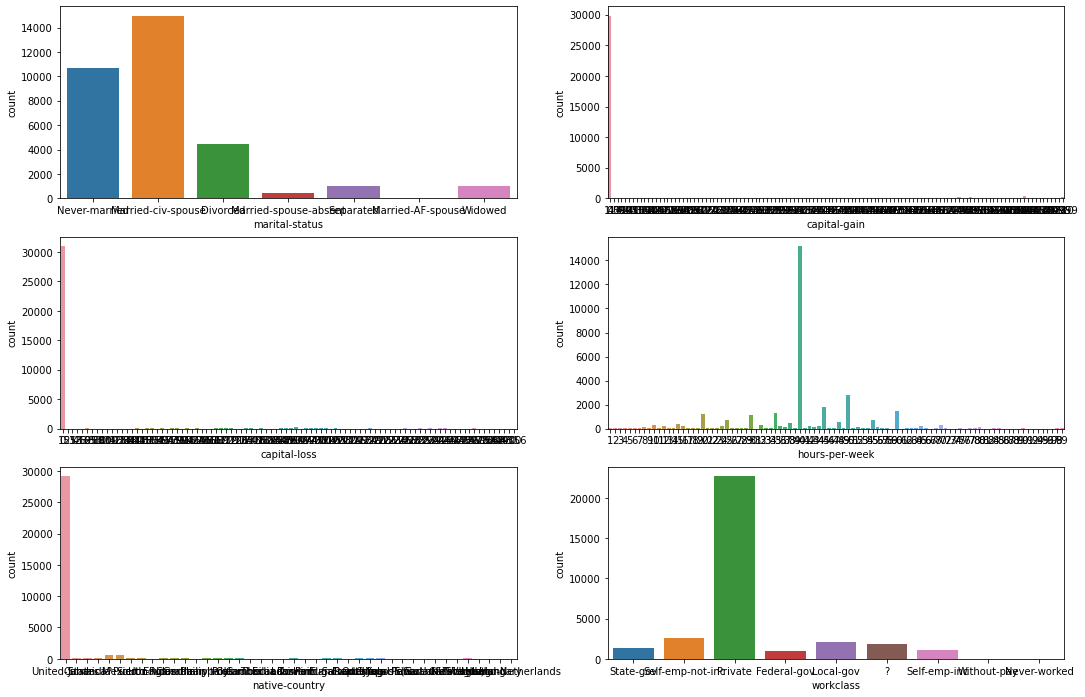

In [18]:
Bar_6(['marital-status','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','workclass'])

In [19]:
categorical_cols = df.columns[df.dtypes == object]
for s in categorical_cols:
    print(s, '=>', df[s].unique(), '\n')

# df[categorical_cols].apply(lambda s: s.unique())

workclass => ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education => ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status => ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation => ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship => ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race => ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex => ['Male' 'Female'] 

native-country => ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puert

буду считать, что '?' это пропущенные значения

In [20]:
df.replace('?',np.nan,inplace=True)


categorical_cols = df.columns[df.dtypes == object]
for s in categorical_cols:
    print(s, '=>', df[s].unique(), '\n')

workclass => ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked'] 

education => ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th'] 

marital-status => ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation => ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship => ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race => ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex => ['Male' 'Female'] 

native-country => ['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puert

<AxesSubplot:>

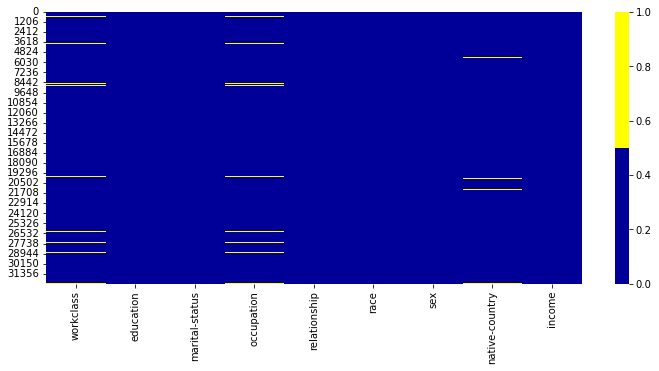

In [21]:
plt.figure(figsize=(12,5))
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[categorical_cols].isnull(), cmap=sns.color_palette(colours))

In [22]:
df.dropna(inplace=True)
df.shape

(30162, 15)

In [23]:
categorical_cols = df.columns[df.dtypes == object]
for s in categorical_cols:
    print(s, '=>', df[s].unique(), '\n')

workclass => ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay'] 

education => ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th'] 

marital-status => ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed'] 

occupation => ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv'] 

relationship => ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative'] 

race => ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other'] 

sex => ['Male' 'Female'] 

native-country => ['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canad

Обратим внимание на education и education-num. По факту, это одно и тоже, поэтому один из параметров можно убрать. 

In [24]:
df = df.drop('education-num', axis=1)

Обратим внимание на fnlwgt. Он бессмысленен, поэтому его тоже убираем

In [25]:
df.drop(["fnlwgt"],axis=1,inplace=True)

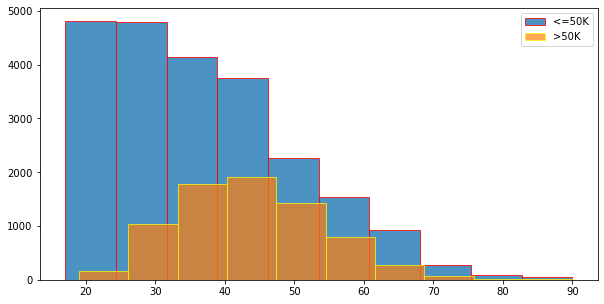

In [26]:
plt.figure(figsize=(10,5))
series1 = df[df['income'] == '<=50K'].age
series2 = df[df['income'] == '>50K'].age
plt.hist(series1, label='<=50K', alpha=.8, edgecolor='red')
plt.hist(series2, label='>50K', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

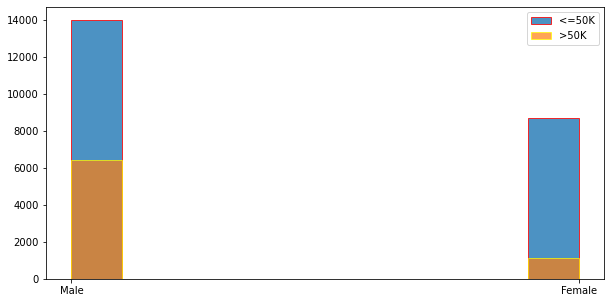

In [27]:
plt.figure(figsize=(10,5))
series1 = df[df['income'] == '<=50K'].sex
series2 = df[df['income'] == '>50K'].sex
plt.hist(series1, label='<=50K', alpha=.8, edgecolor='red')
plt.hist(series2, label='>50K', alpha=0.7, edgecolor='yellow')
plt.legend()
plt.show()

Удалим выбросы

In [28]:
df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1092.007858,88.372489,40.931238
std,13.134665,7406.346497,404.298370,11.979984
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,47.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   marital-status  30162 non-null  object
 4   occupation      30162 non-null  object
 5   relationship    30162 non-null  object
 6   race            30162 non-null  object
 7   sex             30162 non-null  object
 8   capital-gain    30162 non-null  int64 
 9   capital-loss    30162 non-null  int64 
 10  hours-per-week  30162 non-null  int64 
 11  native-country  30162 non-null  object
 12  income          30162 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [30]:
def Boxplot_4(x):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.boxplot(df[x[0]])

    plt.subplot(2,2,2)
    sns.boxplot(df[x[1]])

    plt.subplot(2,2,3)
    sns.boxplot(df[x[2]])

    
    plt.subplot(2,2,4)
    sns.boxplot(df[x[3]])

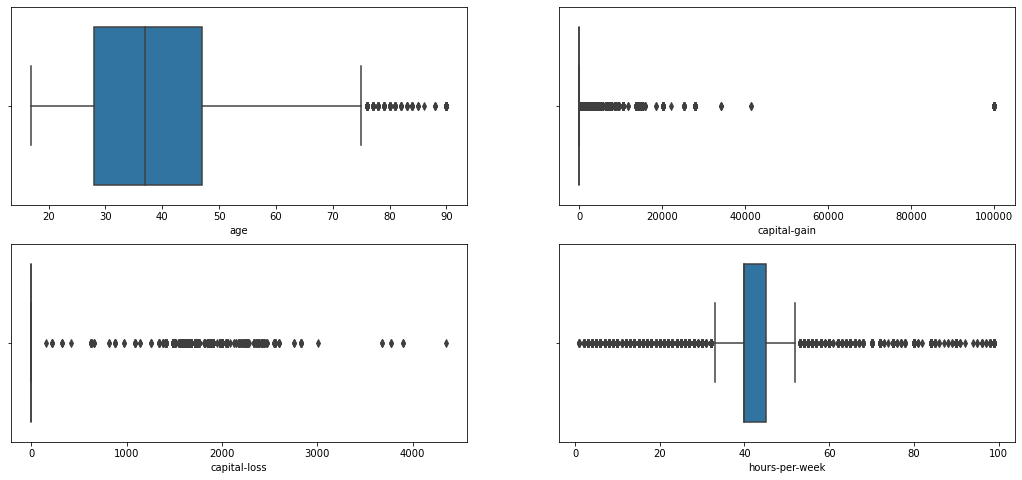

In [31]:
Boxplot_4(df.columns[df.dtypes == int])

<AxesSubplot:>

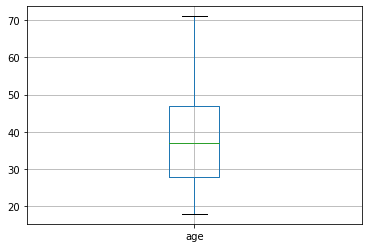

In [32]:
сol_ = "age"
q_hi  = df[сol_].quantile(0.99)
q_low = df[сol_].quantile(0.01)
df = df[(df[сol_] < q_hi) & (df[сol_] > q_low)]
df.boxplot(column=сol_)

<AxesSubplot:>

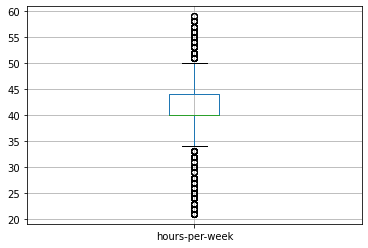

In [33]:
сol_ = "hours-per-week"
q_hi  = df[сol_].quantile(0.95)
q_low = df[сol_].quantile(0.05)
df = df[(df[сol_] < q_hi) & (df[сol_] > q_low)]
df.boxplot(column=сol_)

In [34]:
# # capital-loss
# сol_ = "capital-gain"
# q_hi  = df[сol_].quantile(0.95)
# q_low = df[сol_].quantile(0.05)
# df = df[(df[сol_] < q_hi) & (df[сol_] > q_low)]
# df.boxplot(column=сol_)

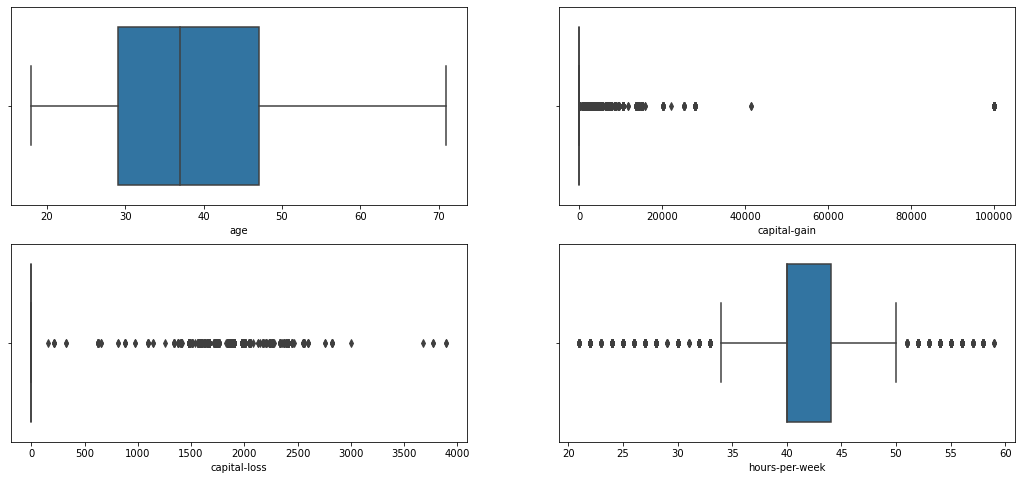

In [35]:
Boxplot_4(df.columns[df.dtypes == int])

In [36]:
def kdeplot_4(x):
    plt.figure(figsize=(18,8))
    plt.subplot(2,2,1)
    sns.kdeplot(x=df[df['income'] == '<=50K'][x[0]], 
                    shade = True)

    plt.subplot(2,2,2)
    sns.kdeplot(x=df[df['income'] == '>50K'][x[0]], 
                    shade = True)

    plt.subplot(2,2,3)
    sns.kdeplot(x=df[df['income'] == '<=50K'][x[1]], 
                    shade = True)

    plt.subplot(2,2,4)
    sns.kdeplot(x=df[df['income'] == '>50K'][x[1]], 
                    shade = True)

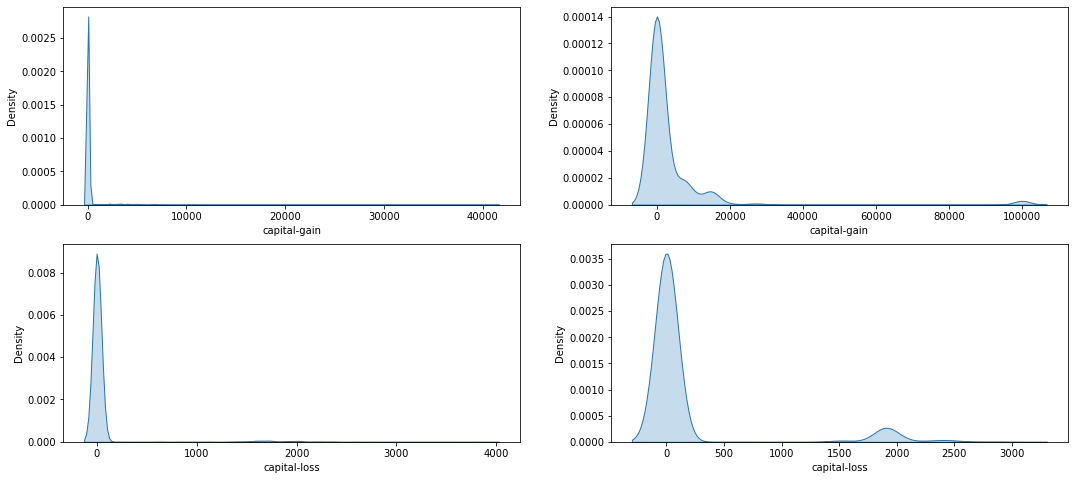

In [37]:
kdeplot_4(['capital-gain', 'capital-loss'])

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25037 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             25037 non-null  int64 
 1   workclass       25037 non-null  object
 2   education       25037 non-null  object
 3   marital-status  25037 non-null  object
 4   occupation      25037 non-null  object
 5   relationship    25037 non-null  object
 6   race            25037 non-null  object
 7   sex             25037 non-null  object
 8   capital-gain    25037 non-null  int64 
 9   capital-loss    25037 non-null  int64 
 10  hours-per-week  25037 non-null  int64 
 11  native-country  25037 non-null  object
 12  income          25037 non-null  object
dtypes: int64(4), object(9)
memory usage: 2.7+ MB


Так как все признаки категориальные, более того номинальные. Поэтому используем One Hot Encoder (get_dummies).

In [39]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

cat_att = df.columns[df.dtypes == object].drop('income')
num_att = df.columns[df.dtypes == int]


# encode all the categorial features
transformer = ColumnTransformer([("num_attrs", StandardScaler(), num_att),
                                 ("cat_attrs", OneHotEncoder(), cat_att)])

Работа с целевой переменной

In [40]:
df_features = df.drop('income', axis=1)
y = df['income']

lb = LabelBinarizer()
y = lb.fit_transform(y)
y

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

Разделение датасета на обучающую и тестовую выборку

In [41]:
df_features = df.drop('income', axis=1)
y = df['income']

x_train, x_test, y_train,y_test = train_test_split(df_features,y,random_state=12,test_size=.3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17525, 12), (7512, 12), (17525,), (7512,))

In [42]:
x_train_transformed = transformer.fit_transform(x_train)
x_test_transformed  = transformer.transform(x_test)

## Построение простых моделей

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [44]:
def metrics_for_cl(clf, X_test, y_test, model_name, time):
    y_ = clf.predict(X_test)
    accuracy_score_ = accuracy_score(y_test, y_)
    precision_recall_fscore_support_ = precision_recall_fscore_support(y_test, y_, average='macro')
    report = pd.DataFrame(list(precision_recall_fscore_support_) + [accuracy_score_, time], 
                          columns=[model_name],
                index=['Precision', 'Recall', 'F1-score', 'Support', 'Accuracy', 'time'])
    report = report.drop('Support')
    

    return report

Логистическая регрессия

In [45]:
start = time.time()
logreg_clf = LogisticRegression()
logreg_clf.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

lg_metrics = metrics_for_cl(logreg_clf, x_test_transformed, y_test, 'LogisticRegression', learning_time)

Метод опорных векторов

In [46]:
start = time.time()
SVC_model = SVC()
SVC_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

svm_metrics = metrics_for_cl(SVC_model, x_test_transformed, y_test, 'SVC', learning_time)

Метод к-ближайших соседей

In [47]:
start = time.time()
KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

metric = metrics_for_cl(KNN_model, x_test_transformed, y_test, 'KNeighborsClassifier', learning_time)

Decision Tree Classifier

In [48]:
start = time.time()
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

tree_metric = metrics_for_cl(dt_model, x_test_transformed, y_test, 'DecisionTreeClassifier', learning_time)

Random Forest Classifier

In [49]:
start = time.time()
randtree = RandomForestClassifier().fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

randtree_metric = metrics_for_cl(randtree, x_test_transformed, y_test, 'RandomForestClassifier', learning_time)

Gradient Boosting Classifier

In [77]:
start = time.time()
grandboost = GradientBoostingClassifier().fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

grandboost_metric = metrics_for_cl(grandboost, x_test_transformed, y_test, 'GradientBoostingClassifier', learning_time)

## Cравнение и анализ моделей

In [79]:
lg_metrics.join([svm_metrics, tree_metric, randtree_metric, grandboost_metric])

,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier
Precision,0.8001,0.805878,0.786324,0.791994,0.82552
Recall,0.758409,0.754645,0.743088,0.763007,0.761415
F1-score,0.775091,0.7742,0.759943,0.775374,0.784839
Accuracy,0.840788,0.842386,0.83107,0.837859,0.85197
time,0.48s,2.2e+01s,0.15s,1.9e+01s,3.2s


Все модели показали хорошие результаты

## Выводы

GradientBoostingClassifier

## Построение моделей с учетом выводов

GradientBoostingClassifier | поиск лучшего значения

100 105 110 115 120 125 131 136 141 146 151 156 162 167 172 177 182 187 193 198 203 208 213 218 224 229 234 239 244 250 


n_estimators
{'deviance': 0.8519701810436635, 'exponential': 0.8507720979765708}
{'deviance': 100, 'exponential': 100}


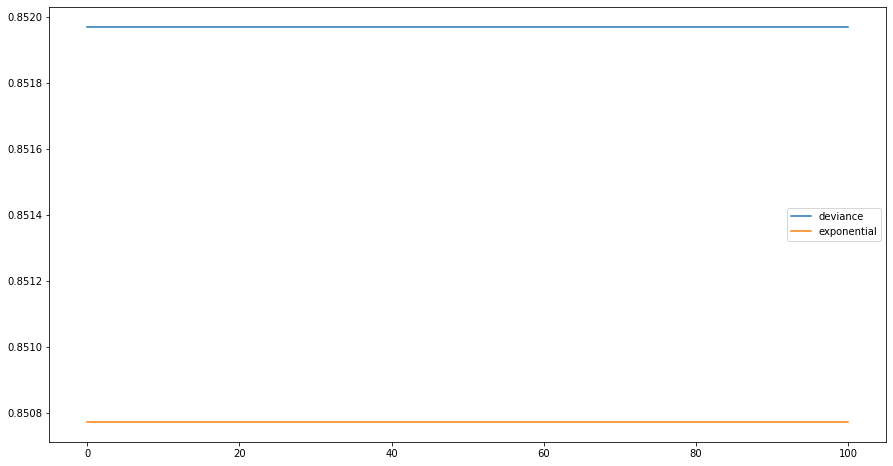

In [101]:
scores_log_loss, scores_exponential = [], []
n_estimators_ = np.linspace(100,250, 30, dtype=int)
max_score = {'deviance':0, 'exponential':0}
max_res = {'deviance':0, 'exponential':0}

for c_num in n_estimators_:
    clf = GradientBoostingClassifier(loss = 'deviance',
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_log_loss.append(res)
    if max_score['deviance'] < res:
        max_score['deviance'] = res
        max_res['deviance'] = c_num
    

    clf = GradientBoostingClassifier(loss='exponential',
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_exponential.append(res)
    if max_score['exponential'] < res:
        max_score['exponential'] = res
        max_res['exponential'] = c_num
    print(c_num, end=' ')

plt.figure(figsize=(15, 8))


plt.plot(learning_rate_, scores_log_loss, label="deviance")
plt.plot(learning_rate_, scores_exponential, label="exponential")

plt.legend(loc="best")

print('\n\n')
print("n_estimators")
print(max_score)
print(max_res)

In [93]:
# params = {'max_features' : ['auto', 'sqrt', 'log2'],
#           'max_depth' : np.linspace(5,50,20, dtype=int) }

# start = time.time()
# grid_search_cv = GridSearchCV(GradientBoostingClassifier(loss='deviance',
#                                                          n_estimators= 20,
#                                                          random_state=42), params, n_jobs=-1, verbose=1, cv=3)
# grid_search_cv.fit(x_train_transformed, y_train)
# stop = time.time()
# print(f"Время обучения: {(stop - start):.2}s")

# grid_search_cv.best_params_

In [99]:
start = time.time()
grandboost = GradientBoostingClassifier(n_estimators= 20,
                                        random_state=42).fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

grandboost_metric = metrics_for_cl(grandboost, x_test_transformed, y_test, 'GradientBoostingClassifier', learning_time)

In [100]:
grandboost_metric

,GradientBoostingClassifier
Precision,0.82552
Recall,0.761415
F1-score,0.784839
Accuracy,0.85197
time,2.1s


Logistic Regression | поиск лучшего значения

2.0 10.25 18.5 26.75 35.0 43.25 51.5 59.75 68.0 76.25 84.5 92.75 101.0 109.25 117.5 125.75 134.0 142.25 150.5 158.75 167.0 175.25 183.5 191.75 200.0 


C
{'l1': 0.8409211927582535, 'l2': 0.8409211927582535}
{'l1': 76.25, 'l2': 26.75}


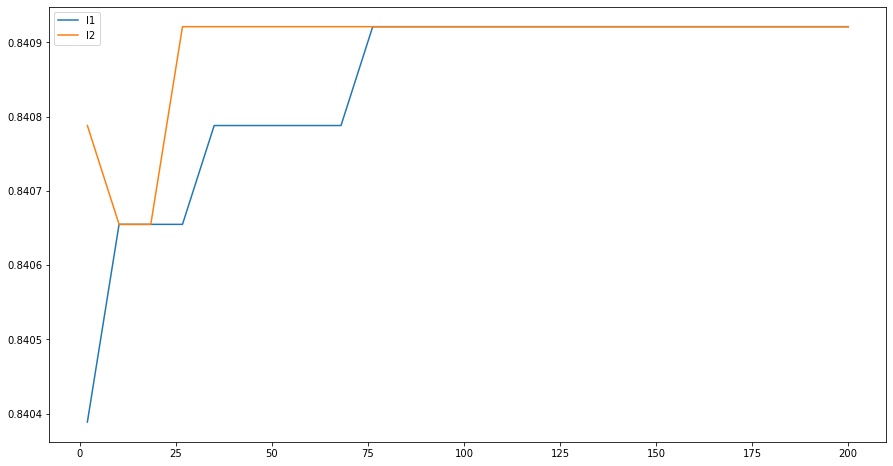

In [52]:
scores_l1, scores_l2 = [], []
# C_ = np.append(np.linspace(0.001,1, 10, dtype=float), np.linspace(2,50, 10, dtype=float))
C_ = np.linspace(2,200, 25, dtype=float)
max_score = {'l1':0, 'l2':0}
max_res = {'l1':0, 'l2':0}

for c_num in C_:
    clf = LogisticRegression(C = c_num,
                              penalty = 'l2',
                              solver='saga',
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_l2.append(res)
    if max_score['l2'] < res:
        max_score['l2'] = res
        max_res['l2'] = c_num
    

    clf = LogisticRegression(C = c_num,
                              penalty = 'l1',
                              solver='saga',
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_l1.append(res)
    if max_score['l1'] < res:
        max_score['l1'] = res
        max_res['l1'] = c_num
    print(c_num, end=' ')

plt.figure(figsize=(15, 8))


plt.plot(C_, scores_l1, label="l1")
plt.plot(C_, scores_l2, label="l2")

plt.legend(loc="best")

print('\n\n')
print("C")
print(max_score)
print(max_res)

In [51]:
# C = np.append(np.linspace(0.001,1, 10, dtype=float), np.linspace(2,50, 10, dtype=float))

# params ={"C":C, "penalty":["l1","l2","elasticnet", None]}

# start = time.time()
# grid_search_cv = GridSearchCV(LogisticRegression(random_state=42, 
#                                                  solver='saga'), params, verbose=1, cv=3)
# grid_search_cv.fit(x_train_transformed, y_train)
# stop = time.time()
# print(f"Время поиска: {(stop - start):.2}s")


In [53]:
# grid_search_cv.best_params_

In [59]:
start = time.time()
lg_model = LogisticRegression(C = 26.75, 
                              penalty = 'l2',
                              random_state=42)
lg_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

lg_metric = metrics_for_cl(dt_model, x_test_transformed, y_test, 'LogisticRegression', learning_time)

In [60]:
lg_metric

,LogisticRegression
Precision,0.753045
Recall,0.742682
F1-score,0.747519
Accuracy,0.812433
time,0.34s


Decision Tree Classifier

2 10 18 27 35 44 52 61 69 77 86 94 103 111 120 128 137 145 153 162 170 179 187 196 204 213 221 229 238 246 255 263 272 280 288 297 305 314 322 331 339 348 356 364 373 381 390 398 407 415 424 432 440 449 457 466 474 483 491 500 


max_leaf_nodes
{'entropy': 0.8505058572949947, 'gini': 0.8482428115015974}
{'entropy': 263, 'gini': 263}


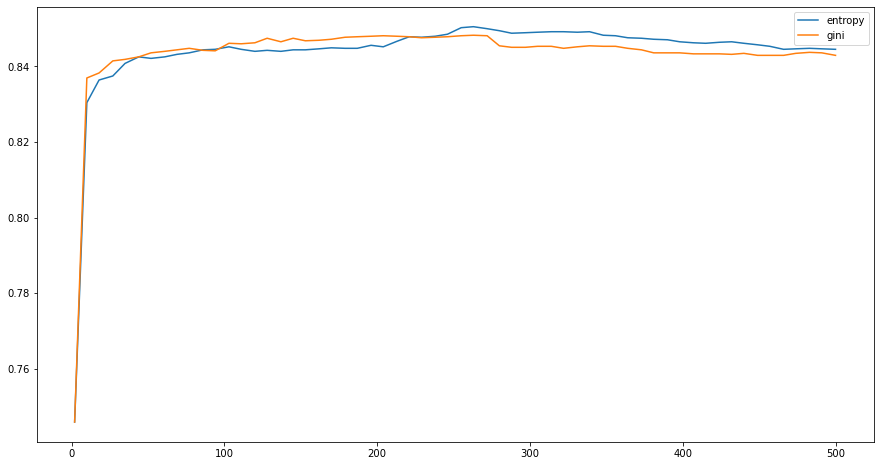

In [61]:
scores_entropy, scores_gini = [], []
max_leaf_nodes_ = np.linspace(2,500, 60, dtype=int)
max_score = {'entropy':0, 'gini':0}
max_res = {'entropy':0, 'gini':0}



for c_num in max_leaf_nodes_:
    clf = DecisionTreeClassifier(criterion = 'entropy',
                                 max_leaf_nodes=c_num,
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_entropy.append(res )
    if max_score['entropy'] < res:
        max_score['entropy'] = res
        max_res['entropy'] = c_num
    

    clf = DecisionTreeClassifier(criterion = 'gini',
                                 max_leaf_nodes=c_num,
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_gini.append(res)
    if max_score['gini'] < res:
        max_score['gini'] = res
        max_res['gini'] = c_num
    print(c_num, end=' ')

plt.figure(figsize=(15, 8))


plt.plot(max_leaf_nodes_, scores_entropy, label="entropy")
plt.plot(max_leaf_nodes_, scores_gini, label="gini")

plt.legend(loc="best")
print('\n\n')
print("max_leaf_nodes")
print(max_score)
print(max_res)

In [66]:
params = {'max_depth': np.linspace(1,100,38, dtype=int), 
          'max_features' : ['auto', 'sqrt', 'log2']}

start = time.time()
grid_search_cv = GridSearchCV(DecisionTreeClassifier(criterion='entropy',
                                                     max_leaf_nodes=263,
                                                     random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(x_train_transformed, y_train)
stop = time.time()
print(f"Время обучения: {(stop - start):.2}s")

grid_search_cv.best_params_

Fitting 3 folds for each of 114 candidates, totalling 342 fits
Время обучения: 2.4e+01s


{'max_depth': 22, 'max_features': 'auto'}

In [70]:
start = time.time()
dt_model = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_features = 'auto',
                                  max_leaf_nodes = 263,
                                  random_state=42)
dt_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

y_pred = dt_model.predict(x_test_transformed)
tree_metric = metrics_for_cl(dt_model, x_test_transformed, y_test, 'DecisionTreeClassifier', learning_time)

In [71]:
tree_metric

,DecisionTreeClassifier
Precision,0.786324
Recall,0.743088
F1-score,0.759943
Accuracy,0.83107
time,0.15s


50 64 78 92 107 121 135 150 164 178 192 207 221 235 250 


n_estimators
{'entropy': 0.8385250266240681, 'gini': 0.838258785942492}
{'entropy': 178, 'gini': 64}


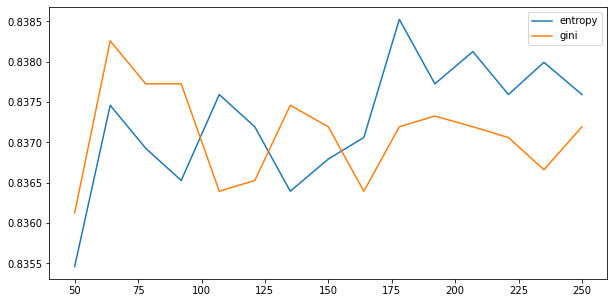

In [74]:
scores_entropy, scores_gini= [], []
n_estimators_ = np.linspace(50,250, 15, dtype=int)
max_score = {'entropy':0, 'gini':0}
max_res = {'entropy':0, 'gini':0}


for c_num in n_estimators_:
    clf = RandomForestClassifier(criterion = 'entropy',
                                 n_estimators=c_num,
                                 n_jobs = -1,
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_entropy.append(res )
    if max_score['entropy'] < res:
        max_score['entropy'] = res
        max_res['entropy'] = c_num
    

    clf = RandomForestClassifier(criterion = 'gini',
                                 n_estimators=c_num,
                                 n_jobs = -1,
                              random_state=42)
    clf.fit(x_train_transformed, y_train)
    res = clf.score(x_test_transformed, y_test)
    scores_gini.append(res)
    if max_score['gini'] < res:
        max_score['gini'] = res
        max_res['gini'] = c_num
        
    print(c_num, end=' ')

plt.figure(figsize=(10, 5))


plt.plot(n_estimators_, scores_entropy, label="entropy")
plt.plot(n_estimators_, scores_gini, label="gini")


plt.legend(loc="best")
print('\n\n')
print("n_estimators")
print(max_score)
print(max_res)

In [73]:
# params = {'n_estimators': np.linspace(50,250, 5, dtype=int),
#           'criterion':['gini', 'entropy', 'log_loss'],
#            'max_features' : ['auto', 'sqrt', 'log2']}

params = {'n_estimators': [64],
          'criterion':['entropy'],
           'max_features' : ['auto', 'sqrt', 'log2']}

start = time.time()
grid_search_cv = GridSearchCV(RandomForestClassifier(random_state=42), params, verbose=2, cv=3)
grid_search_cv.fit(x_train_transformed, y_train)
stop = time.time()
print(f"Время обучения: {(stop - start):.2}s")

grid_search_cv.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END criterion=entropy, max_features=auto, n_estimators=64; total time=   4.1s
[CV] END criterion=entropy, max_features=auto, n_estimators=64; total time=   4.1s
[CV] END criterion=entropy, max_features=auto, n_estimators=64; total time=   4.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=64; total time=   4.8s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=64; total time=   4.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=64; total time=   5.3s
[CV] END criterion=entropy, max_features=log2, n_estimators=64; total time=   4.9s
[CV] END criterion=entropy, max_features=log2, n_estimators=64; total time=   5.5s
[CV] END criterion=entropy, max_features=log2, n_estimators=64; total time=   4.1s
Время обучения: 5.1e+01s


{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 64}

In [106]:
start = time.time()
rf_model = RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 64,
                                  max_features = 'auto',
                                  random_state=42)
rf_model.fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

y_pred = rf_model.predict(x_test_transformed)
tree_metric = metrics_for_cl(rf_model, x_test_transformed, y_test, 'RandomForestClassifier', learning_time)

In [117]:
tree_metric

,DecisionTreeClassifier
Precision,0.791124
Recall,0.763258
F1-score,0.775214
Accuracy,0.83746
time,2e+01s


## Итоговый результат

In [102]:
start = time.time()
grandboost = GradientBoostingClassifier(n_estimators= 20,
                                        random_state=42).fit(x_train_transformed, y_train)
stop = time.time()
learning_time = f"{(stop - start):.2}s"

grandboost_metric = metrics_for_cl(grandboost, x_test_transformed, y_test, 'GradientBoostingClassifier', learning_time)

y_pred = grandboost.predict(x_test_transformed)

In [103]:
grandboost_metric

,GradientBoostingClassifier
Precision,0.844896
Recall,0.702457
F1-score,0.735549
Accuracy,0.836661
time,0.5s


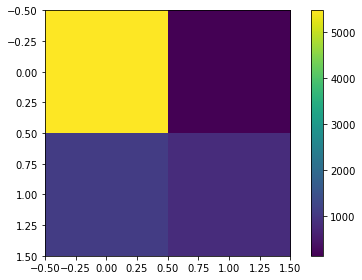

In [104]:
cf_m = confusion_matrix(y_test, y_pred)
                
class_names = np.unique(y)  
num_classes = class_names.size        
    
# plt.figure(figsize=(,8))
plt.imshow(cf_m)
plt.tight_layout()
plt.colorbar()
plt.show()

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.83      0.98      0.90      5603
        >50K       0.86      0.43      0.57      1909

    accuracy                           0.84      7512
   macro avg       0.84      0.70      0.74      7512
weighted avg       0.84      0.84      0.82      7512

